Instruction: This homework is not finalized. I will fill out this assignment with more code chunk. If you don't need additional code to help you finish the homework, you can work on it with yout own code now. 

1. Construct a linear network to learn the parameter $w$ in the following code. You will see that $w$ here is the same as the class example, but the convergence speed is different.

In [2]:
import torch
import torch.nn as nn
# #Single variable regression by torch
#y=2*x
x=torch.tensor([0.1,0.2,0.3,0.4], dtype=torch.float32)
y=torch.tensor([0.2,0.4,0.6,0.8], dtype=torch.float32)
w=torch.tensor(0.0, dtype=torch.float32,requires_grad=True)
#model prediction
def forward(x):
    return w*x

#Loss
loss_nn = nn.MSELoss()

#Learning rate
lr=0.1
n_iter=200

#Gradient descent
optimizer = torch.optim.SGD([w],lr=lr)

L=1
epoch=1

#Run the loop until the loss is less than some threshold
while L>=1e-5:
    #forward pass
    y_pred = forward(x)
    
    #Loss function
    L = loss_nn(y,y_pred)
    L.backward()
    
    #Parameter update
    optimizer.step()
    
    w.grad.zero_()
    if epoch%10==0:
        print(f'epoch {epoch}: w={w:.5f}, loss={L:.5f}')
    epoch+=1


epoch 10: w=0.28054, loss=0.22855
epoch 20: w=0.52173, loss=0.16893
epoch 30: w=0.72908, loss=0.12486
epoch 40: w=0.90735, loss=0.09229
epoch 50: w=1.06062, loss=0.06821
epoch 60: w=1.19239, loss=0.05042
epoch 70: w=1.30567, loss=0.03727
epoch 80: w=1.40306, loss=0.02755
epoch 90: w=1.48680, loss=0.02036
epoch 100: w=1.55878, loss=0.01505
epoch 110: w=1.62067, loss=0.01112
epoch 120: w=1.67388, loss=0.00822
epoch 130: w=1.71962, loss=0.00608
epoch 140: w=1.75895, loss=0.00449
epoch 150: w=1.79276, loss=0.00332
epoch 160: w=1.82183, loss=0.00245
epoch 170: w=1.84682, loss=0.00181
epoch 180: w=1.86831, loss=0.00134
epoch 190: w=1.88678, loss=0.00099
epoch 200: w=1.90266, loss=0.00073
epoch 210: w=1.91632, loss=0.00054
epoch 220: w=1.92806, loss=0.00040
epoch 230: w=1.93815, loss=0.00030
epoch 240: w=1.94682, loss=0.00022
epoch 250: w=1.95428, loss=0.00016
epoch 260: w=1.96069, loss=0.00012
epoch 270: w=1.96621, loss=0.00009
epoch 280: w=1.97095, loss=0.00007
epoch 290: w=1.97502, loss=0.

2. Verify the Approximation Theorem II we proved in class. Construct a neural network in the theorem to approximate $x^2$ on $[-1,1]$. Let $\epsilon = 0.1$, build your training set wisely so the error is bounded by $\epsilon$.

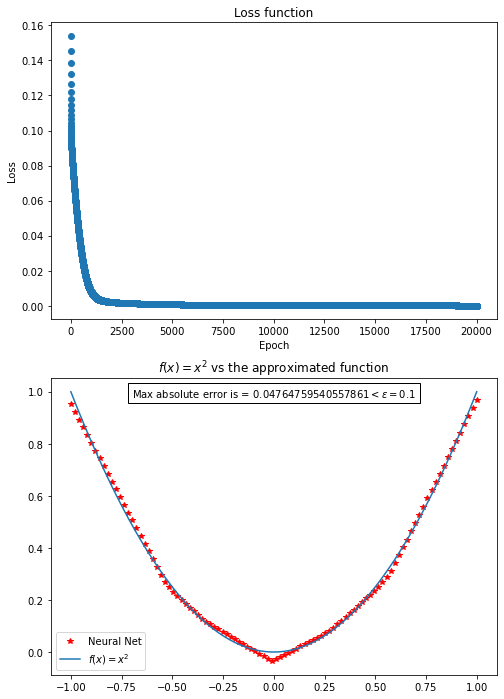

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from matplotlib.offsetbox import AnchoredText
import warnings


a=-1
b=1
e=0.1
n=20
error = 0.0001 


input_size = [1,n]
output_size = [n,1]

t=np.linspace(-1,1,100)
x=[[i] for i in t]

x=torch.tensor(x,dtype=torch.float32)
y=x**2

#4 samples, 1 feature
n_sample, n_feature=x.shape

#forward function
#model = nn.Linear(input_size,output_size)

class LinearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegression,self).__init__()
        #define Layers
        self.lin1=nn.Linear(input_dim[0],output_dim[0])
        self.act=nn.ReLU()
        self.lin2=nn.Linear(input_dim[1],output_dim[1],bias=False)
        
    def forward(self,x):
        y=self.lin1(x)
        y=self.act(y)
        y=self.lin2(y)
        
        return y

        
model = LinearRegression(input_size,output_size) 


#Loss
loss_nn = nn.MSELoss()#nn.L1Loss(reduction='none')

#Learning rate
lr=0.01
n_iter=1000

#Gradient descent
optimizer=torch.optim.SGD(model.parameters(),lr=lr)




L_vec=[]
epoch_vec=[]
epoch=1
L=1
while L>=error and epoch<=20000:
    
    optimizer.zero_grad()
    #forward pass
    y_pred = model(x)
    
    #Loss function
    L = loss_nn(y_pred,y)
    L.backward()
    
    #Parameter update
    optimizer.step()
    
    L_vec=L_vec+[L.detach().numpy()]
    epoch_vec=epoch_vec+[epoch]
    epoch=epoch+1

    
if epoch==2001:
    warnings.warn("Sorry the model did not converge, please run again")
else:
    x = torch.linspace(-1,1,100).view(-1,1)
    f = x**2
    y_pred = model(x).detach()
    fig,axs= plt.subplots(2,1,figsize=(8,12))
    axs[0].scatter(epoch_vec,L_vec)

    axs[0].set_title('Loss function')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')

    axs[1].plot(t,y_pred.detach().numpy(),'r*',label='Neural Net')

    error_text='Max absolute error is = '+str(max(abs(f-y_pred)).item())+'$< \epsilon = $'+str(e)
    anchored_text = AnchoredText(error_text, loc=9)
    axs[1].add_artist(anchored_text)
    axs[1].plot(t,y,label='$f(x)=x^2$')
    axs[1].set_title('$f(x)=x^2$ vs the approximated function')
    axs[1].legend(loc=3)

In [36]:
y.shape

torch.Size([100, 1])

3. Learn the house price of Boston with a deep (at least two hidden layer) neural network. 

Leave 25% of data as test data.

Use MSELoss for your loss function.

Construct a neural network with 40 nodes in the first layer, 20 nodes in the second layer, 10 nodes in the third layer, one node in output layer. Use Relu as the activation function of each layer.

Use sklearn.metrics.r2_score to evaluate the training accuracy and test accuracy. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [45]:
from sklearn.datasets import load_boston
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
dataset = load_boston()
df=pd.DataFrame(dataset.data)
df.columns=dataset.feature_names
df["Price"]=dataset.target 
#house price is in the last column, there might be a warning message
x = np.array([np.array(df.iloc[i]) for i in range(len(df))])[:,0:13]
y_true = np.array([np.array(df.iloc[i]) for i in range(len(df))])[:,13]
y_true=np.array([[i] for i in y_true])


In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_true, test_size=0.25, random_state=10)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)
x_train,y_train = torch.from_numpy(x_train.astype(np.float32)),torch.from_numpy(y_train.astype(np.float32))
x_test,y_test = torch.from_numpy(x_test.astype(np.float32)),torch.from_numpy(y_test.astype(np.float32))

Max accuracy was obtained at epoch = 6462
Max Accuracy (training) = 0.9700054169746644
Minimum loss is = 0.029994579
The testing set r2 score is = 0.8696014923979865


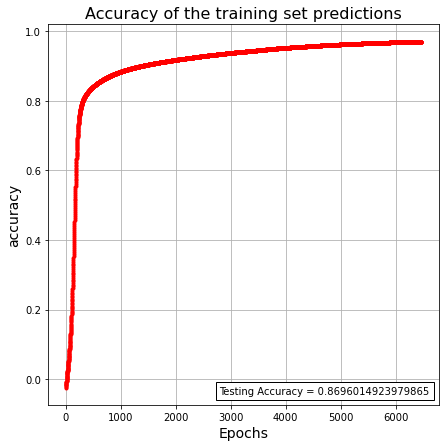

In [49]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

input_size = [13,40,20,10]
output_size = [40,20,10,1]
e = 7
#4 samples, 1 feature
n_sample, n_feature=x.shape

#forward function
#model = nn.Linear(input_size,output_size)

class PredictPrices(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(PredictPrices,self).__init__()
        #define Layers
        self.network=nn.Sequential(
            nn.Linear(input_dim[0],output_dim[0]),
            nn.ReLU(),
            nn.Linear(input_dim[1],output_dim[1]),
            nn.ReLU(),
            nn.Linear(input_dim[2],output_dim[2]),
            nn.ReLU(),
            nn.Linear(input_dim[3],output_dim[3]),
        )       
        
    def forward(self,x):
            y=self.network(x)
            return y

        
model = PredictPrices(input_size,output_size) 


#Loss
loss_nn = nn.MSELoss()

#Learning rate
lr=0.01

#Gradient descent
optimizer=torch.optim.SGD(model.parameters(),lr=lr)




L_vec=[]

epoch_vec=[]

accuracy=[]



for epoch in range(100000):
    
    
    #forward pass
    y_pred = model(x_train)
    
    #Loss function
    L = loss_nn(y_train,y_pred)
    accuracy = accuracy+[r2_score(y_train.detach().numpy(),y_pred.detach().numpy())]
    
    L_vec=L_vec+[L.detach().numpy()]
    epoch_vec=epoch_vec+[epoch]
    
    if r2_score(y_train.detach().numpy(),y_pred.detach().numpy())>=0.97:
        break
        
        
    L.backward()
    
    #Parameter update
    optimizer.step()
    optimizer.zero_grad()
    
    
y_pred_test = model(x_test)
r2score_test = r2_score(y_pred_test.detach().numpy(),y_test.detach().numpy())
     
fig,ax = plt.subplots(figsize=(7,7))

ax.plot(epoch_vec,accuracy,'r.',label='Neural Net')

error_text='Testing Accuracy = '+ str(r2score_test)
anchored_text = AnchoredText(error_text, loc=4)
ax.add_artist(anchored_text)
ax.set_title('Accuracy of the training set predictions',fontsize=16)
ax.set_xlabel('Epochs',fontsize=14)
ax.set_ylabel('accuracy',fontsize=14)
ax.grid(1)
print('Max accuracy was obtained at epoch =',np.where(accuracy==max(accuracy))[0][0])
print('Max Accuracy (training) =', max(accuracy))
print('Minimum loss is =',min(L_vec))
print('The testing set r2 score is =',r2score_test)
